## Timing Details
Analyze computation times for steering and collision checking.

In [1]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

In [2]:
mpb = MPB()

Any configuration values (or subtrees) can be set and retrieved using the bracket operator on the `MPB` instance. The key is a string and by using the dot-notation, a path can be given:

In [3]:
mpb["ompl.seed"] = 4  # set the seed of the OMPL planners

Some helper functions are available to set environment properties, and configure the planners, steer functions and post smoothers:

In [20]:
mpb.set_corridor_grid_env(radius = 3, width = 100, height = 100, branches = 200)
mpb.set_planners(['rrt', 'informed_rrt_star', 'informed_rrt_star', 'cforest', 'sbpl_mha'])
mpb.set_steer_functions(['reeds_shepp'])

Run the motion planning benchmark:

In [21]:
mpb.run(id='test_run', runs=3)  # optional run ID, number of runs (environments)

Running MPB with ID test_run (log file at test_run.log)...


0

In [22]:
mpb.print_info()

+++++++++++++++++++++++++ Run #0 (1 / 3) +++++++++++++++++++++++++
+ Steering:        Reeds-Shepp 
+ Environment:     grid
+ Planners:        SBPL_MHA, CForest, RRT, InformedRRTstar
+ Found solution:  4 / 4
+ Exact solution:  4 / 4
+ Found colliding: 0 / 4
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++ Run #1 (2 / 3) +++++++++++++++++++++++++
+ Steering:        Reeds-Shepp 
+ Environment:     grid
+ Planners:        SBPL_MHA, CForest, RRT, InformedRRTstar
+ Found solution:  4 / 4
+ Exact solution:  4 / 4
+ Found colliding: 0 / 4
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++ Run #2 (3 / 3) +++++++++++++++++++++++++
+ Steering:        Reeds-Shepp 
+ Environment:     grid
+ Planners:        SBPL_MHA, CForest, RRT, InformedRRTstar
+ Found solution:  4 / 4
+ Exact solution:  4 / 4
+ Found colliding: 0 / 4
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



Visualize the planner trajectories:

Visualizing test_run_results.json
Saved plots/corridor_trajectories.pdf.


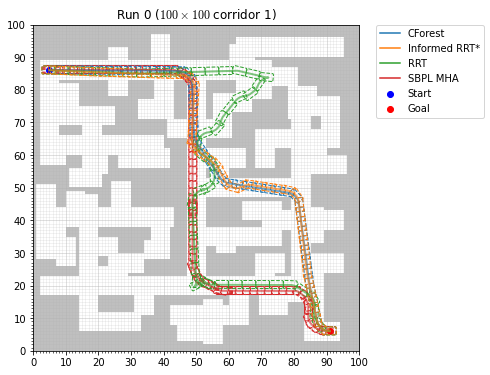

In [41]:
mpb.visualize_trajectories(combine_views=False, save_file='plots/corridor_trajectories.pdf', num_colors=9, run_id='0')

Plot planner statistics:

In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np
file = open(mpb.results_filename, "r")
data = json.load(file)
file.close()

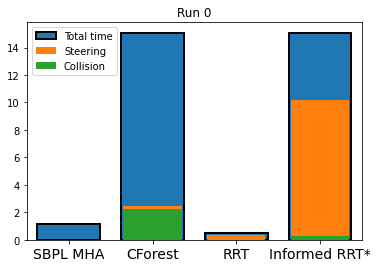

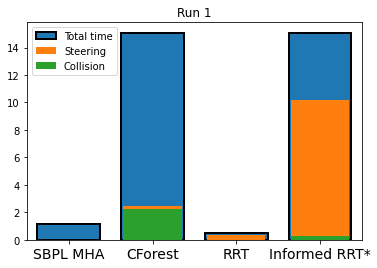

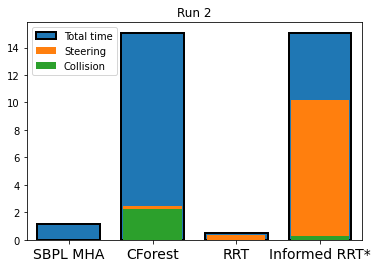

In [29]:
from utils import convert_planner_name

for run_id in range(len(data["runs"])):
    plt.figure("Run %i" % run_id)
    planners, total_times, steering_times, collision_times = [], [], [], []
    for planner, plan in data["runs"][0]["plans"].items():
        planners.append(planner)
        total_times.append(plan["stats"]["planning_time"])
        steering_times.append(plan["stats"]["steering_time"])
        collision_times.append(plan["stats"]["collision_time"])

    xs = np.arange(len(planners)) + 0.5
    plt.title("Run %i" % run_id)
    plt.bar(xs, total_times, width=0.75, edgecolor="black", linewidth=2, linestyle="-", label="Total time")
    plt.bar(xs, np.array(collision_times) + np.array(steering_times), width=0.7, label="Steering")
    plt.bar(xs, collision_times, width=0.7, label="Collision")
    plt.legend()
    plt.xticks(xs, [convert_planner_name(p) for p in planners], rotation=0, fontsize=14)
    plt.gca().set_xlim([0, len(planners)])
    plt.savefig('plots/corridor_timings_%i.pdf' % run_id)
    plt.show()